<h1>2: Data Hypothesis &amp; Preparation<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Data-Formatting" data-toc-modified-id="Data-Formatting-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Formatting</a></span></li><li><span><a href="#2.title" data-toc-modified-id="2.title-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>2.title</a></span></li><li><span><a href="#3.title" data-toc-modified-id="3.title-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>3.title</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import sys
import src.code2_data_preparation as f2
import seaborn as sns
# pip install xlrd

### Imports    
   

**Import of the .csv obtained in the previous step, assigned to:**
`dataframe`.    


In [2]:
dataframe_GSFA = f2.import_csv("data-processed/attacks_updated_v1.csv")
dataframe_ISFA_types = f2.import_xls_to_csv("data-inputs/ISAF_attack_type_20192020.xls")
dataframe_ISFA_activity = f2.import_xls_to_csv("data-inputs/ISAF_victim_activity_20192020.xls")

In [3]:
df1 = dataframe_GSFA.copy()

In [4]:
df2 = dataframe_ISFA_activity.copy()

In [5]:
df3 = dataframe_ISFA_types.copy()

### Data Formatting   
   


**Slicing dataframe to obtain wanted columns**

In [6]:
df1=df1.loc[df1['year']==2019]

In [7]:
df2019= df1[['type','activity','fatal']].reset_index(drop=True)

**Changing column names and `dtypes`**

In [8]:
df2019['fatal'] = df2019['fatal'].replace(['N','Y','UNKNOWN',' N','F','2017','y','M','Y x 2','N '],['NO','YES','UNKNOWN','NO','YES','INVALID','YES','INVALID','INVALID','NO'])
df2019 = df2019.rename(columns = {'type':'attack'})
df2 = df2.rename(columns ={'2019_percent':'perc2019', '2020_percent':'perc2020'})
df3 = df3.rename(columns ={'attack_type':'attack','2019_count':'count2019', '2020_count':'count2020'})
df2.perc2019 = df2.perc2019*100
df2.perc2020 = df2.perc2020*100

In [9]:
df2019 = df2019.astype({'attack':'category','activity':'category','fatal':'category'})
df2[['perc2019']]= df2['perc2019'].astype('int64')
df2[['perc2020']]= df2['perc2020'].astype('int64')
df2 = df2.astype({'victim_activity':'category'})
df3 = df3.astype({'attack':'category'})

In [10]:
df2019.dtypes   
      
      

attack      category
activity    category
fatal       category
dtype: object

**Exploring patterns**

In [11]:
testing_unprov = df2019[df2019['attack']=='Unprovoked']
testing_unprov.value_counts()

attack      activity                  fatal
Unprovoked  Surfing                   NO       28
            Swimming                  NO       12
            Spearfishing              NO        7
            Snorkeling                NO        6
            Boogie boarding           NO        4
            Scuba diving              NO        2
            Standing                  NO        2
            Wading                    NO        2
            Fishing                   YES       2
            Kayaking                  NO        1
            Surf skiing               NO        1
            Swimming/ Treading water  NO        1
            Swimming with sharks      NO        1
            Swimming                  YES       1
            Body Surfing              NO        1
            Surfing                   YES       1
            Body-surfing              NO        1
            Fishing                   NO        1
            Paddle boarding           NO        1
      

In [12]:
testing_fatal = df2019[df2019.fatal=='NO']
testing_fatal.value_counts()

attack        activity                     fatal
Unprovoked    Surfing                      NO       28
              Swimming                     NO       12
              Spearfishing                 NO        7
              Snorkeling                   NO        6
Provoked      Fishing                      NO        5
Unprovoked    Boogie boarding              NO        4
              Scuba diving                 NO        2
Provoked      Surfing                      NO        2
Unprovoked    Standing                     NO        2
              Wading                       NO        2
              Spearfishing / Diving        NO        1
              Stand-Up Paddleboarding      NO        1
              Surf skiing                  NO        1
Invalid       Boogie boarding              NO        1
Unprovoked    Swimming/ Treading water     NO        1
Unverified    Surfing                      NO        1
Watercraft    Fishing                      NO        1
              Ka

In [13]:
df2019['activity'].count()

109

In [14]:
df2019.fatal.value_counts()

NO     98
YES     9
Name: fatal, dtype: int64

In [15]:
df2019.attack.value_counts()

Unprovoked      88
Provoked        11
Questionable     5
Watercraft       4
Invalid          2
Unconfirmed      1
Unverified       1
Name: attack, dtype: int64

In [16]:
df2.value_counts()

victim_activity         perc2019  perc2020
Body surfing/horseplay  8         5           1
Scuba                   3         3           1
Snorkeling/free-diving  11        3           1
Surfing/board sports    53        61          1
Swimming/wading         25        26          1
dtype: int64

In [17]:
df2019.activity.value_counts()

Surfing                        32
Swimming                       13
Snorkeling                     11
Fishing                        10
Spearfishing                    9
Boogie boarding                 6
Wading                          3
Kayaking                        3
Scuba diving                    2
Standing                        2
Swimming/ Treading water        1
Swimming with sharks            1
Surf skiing                     1
Stand-Up Paddleboarding         1
Spearfishing / Diving           1
Abalone diving                  1
Picking opihi                   1
Body Boarding                   1
Paddle boarding                 1
Kayaking fishing                1
Free diving                     1
Fishing                         1
Feeding sharks                  1
Diving in shark tank            1
Diving                          1
Body-surfing                    1
Body Surfing                    1
Paddling an outrigger canoe     1
Name: activity, dtype: int64

In [18]:
to_be_renamed = list(df2019.activity.unique())

Swimming/ Treading water        1
Swimming with sharks            1
Surf skiing                     1
Stand-Up Paddleboarding         1
Spearfishing / Diving           1
Abalone diving                  1
Picking opihi                   1
Body Boarding                   1
Paddle boarding                 1
Kayaking fishing                1
Free diving                     1
Fishing                         1
Feeding sharks                  1
Diving in shark tank            1
Diving                          1
Body-surfing                    1
Body Surfing                    1
Paddling an outrigger canoe     1

Swimming/wading
'Swimming/ Treading water',
'Swimming',
'Wading'


Surfing/board sports
'Surf skiing ',
'Boogie boarding',
 'Surfing','Stand-Up Paddleboarding',
 'Spearfishing'

Body surfing/horseplay
'Body-surfing'
'Body Surfing'
'Body Boarding'

Snorkeling/free-diving 
'Free diving',
'Snorkeling',

Scuba
'Scuba diving'

In [19]:
to_be_renamed

['Swimming',
 'Spearfishing',
 'Surf skiing ',
 'Boogie boarding',
 'Surfing',
 'Fishing',
 'Kayaking',
 'Free diving',
 'Stand-Up Paddleboarding',
 'Snorkeling',
 'Feeding sharks',
 'Kayaking fishing',
 nan,
 'Wading',
 'Swimming/ Treading water',
 'Standing',
 'Spearfishing / Diving',
 'Fishing ',
 'Scuba diving',
 'Diving',
 'Body-surfing',
 'Paddle boarding',
 'Abalone diving',
 'Body Boarding',
 'Body Surfing',
 'Swimming with sharks',
 'Picking opihi',
 'Diving in shark tank',
 'Paddling an outrigger canoe']

<AxesSubplot:xlabel='attack', ylabel='count'>

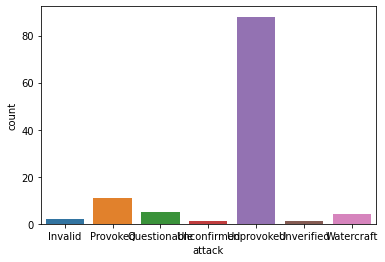

In [20]:
sns.countplot(x=df2019.attack)

In [21]:
df2019.attack.value_counts()

Unprovoked      88
Provoked        11
Questionable     5
Watercraft       4
Invalid          2
Unconfirmed      1
Unverified       1
Name: attack, dtype: int64

<AxesSubplot:xlabel='activity', ylabel='count'>

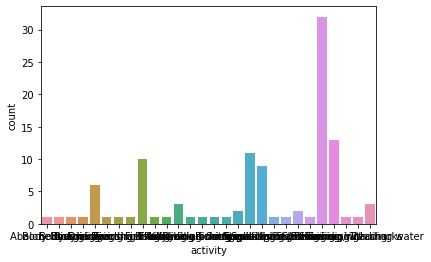

In [22]:
sns.countplot(x=df2019.activity)

In [23]:
df2019.attack.unique()

['Unprovoked', 'Provoked', 'Questionable', 'Watercraft', 'Unconfirmed', 'Unverified', 'Invalid']
Categories (7, object): ['Unprovoked', 'Provoked', 'Questionable', 'Watercraft', 'Unconfirmed', 'Unverified', 'Invalid']

In [24]:
df3.attack = df3['attack'].replace(['Unprovoked attacks','Provoked attacks','Boat attacks','Not confirmed','NaN','Doubtful','Scavenge','Public aquaria'],['Unprovoked','Provoked','Watercraft','Unconfirmed','Invalid','Questionable','Questionable','Questionable'])

<AxesSubplot:xlabel='attack', ylabel='count'>

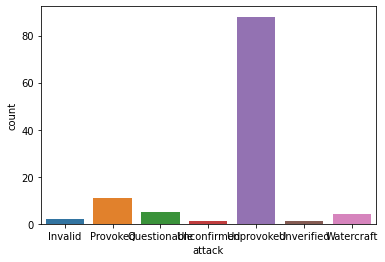

In [33]:
sns.countplot(x=df2019.attack)

<AxesSubplot:xlabel='attack', ylabel='count'>

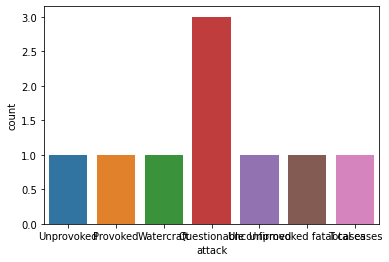

In [34]:
sns.countplot(x=df3.attack)

In [25]:
df3

,attack,count2019,count2020
0,Unprovoked,64,57
1,Provoked,41,39
2,Watercraft,12,6
3,Questionable,1,1
4,Questionable,1,1
5,Questionable,3,3
6,NaN,9,6
7,Unconfirmed,9,16
8,Unprovoked fatal cases,2,10
9,Total cases,140,129


**R**

In [26]:
datafr

NameError: name 'datafr' is not defined

### 2.title   
   


**p**

In [27]:
dat

NameError: name 'dat' is not defined

**Dr.**

In [28]:
dr

NameError: name 'dr' is not defined

In [29]:
f

NameError: name 'f' is not defined

**Q**

In [30]:
da

NameError: name 'da' is not defined

### 3.title
        
        

**Es:**

In [31]:
df = f1.export_df_to_csv_and_check (data2)

NameError: name 'f1' is not defined